이번 ipython notebook 파일에서 주로 다룰 것은 sample, random variable, distribution 간의 definition의 혼동 사항에 대해서 주로 다루며 개념정리를 분명히 하는 것에 집중하려 합니다. 이에 따라 ,이전에 다뤘던 내용들이 중복해서 나올 수 있습니다. 제목도 Review입니다.

### 확률적 데이터
- 항상 동일한 값이 나오는 data -- 결정론적 data
- 예측할 수 없고, 동일하지 않은 값이 나올 수 있는 data -- 확률론적 data 
- 확률론적 데이터에서는 데이터 전체 특성, 즉 데이터 집합의 `분포 특성`이 중요합니다.

### 분포 특성
- 샘플 평균
- 샘플 최빈값
- 샘플 중앙값
- 샘플 분산 & 표준 편차
- 샘플 왜도 & 첨도

##### 샘플 평균 
- 데이터 분포의 대략적인 위치를 나타냅니다.
- m = small x bar = 1/N sum(x_i) i to N

##### 샘플 중앙값
- 전체 자료를 크기별로 정렬하였을 때 가장 중앙에 위치하는 값을 의미합니다.
- if N%2==0: arr[(N/2)] + arr[(N/2)+1]
- if N%2!=0: arr[(N+1)/2]

##### 샘플 최빈값
- 데이터의 값 중 가장 빈번하게 나오는 값을 말합니다.
- 이산 확률 변수의 샘플 데이터에서는 최빈값을 구할 수 있습니다.
- 연속 확률 분포에서는 특정한 값이 나올 확률이 항상 0(zero)이므로 최빈값을 구하기 힘듦
- 따라서 연속 확률 분포에서는 히스토그램과 같이 interval을 할당하고 대푯값을 구합니다.

In [4]:
np.random.seed(0)
x=np.random.randn(1000)

In [5]:
np.mean(x),np.median(x)

(-0.045256707490195384, -0.058028034799627745)

In [11]:
ns,bins=np.histogram(x,bins=np.linspace(-10,10,20))
# Compute the histogram of a set of data.

In [12]:
ns,bins

(array([  0,   0,   0,   0,   0,   0,   6,  54, 247, 426, 213,  52,   2,
          0,   0,   0,   0,   0,   0], dtype=int64),
 array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
         -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
         -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
          2.63157895,   3.68421053,   4.73684211,   5.78947368,
          6.84210526,   7.89473684,   8.94736842,  10.        ]))

연속형 확률 변수에서는 특정값에 대해서 확률이 0이 나오므로, 히스토그램을 이용해서 대표값으로 mode를 구한다고 위에서 언급했습니다. 이에 따라 ns에는 각 구간별 frequency bins에는 각 구간(interval)이 나와있습니다.

In [13]:
M=np.argmax(ns)# 해당 값이 가장 높은 index를 반환!
bins[M],bins[M+1] # index를 대입해서 값을 대입!

(-0.526315789473685, 0.5263157894736832)

##### 연습 문제 1¶
- 1) NumPy를 사용하여 100개의 숫자를 무작위로 생성한 후 히스토그램을 그리고 샘플 평균을 구한다.
- 2) 1번과 같이 100개의 숫자 생성 및 샘플 평균 계산을 50번 반복하여 50개의 샘플 평균을 구한다.
- 3) 2번에서 구한 50개의 샘플 평균의 히스토그램을 그리고 1번에서 구한 히스토그램과 겹쳐서 그린다.

In [17]:
sample = np.random.rand(100)
np.mean(sample)

0.5022540526272258

In [23]:
list_sample_mean = [np.mean(np.random.rand(100)) for _ in range(50) ]
np.mean(list_sample_mean)

0.5067989959006884

<IPython.core.display.Javascript object>


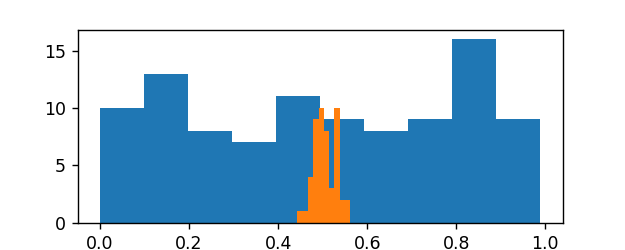

In [28]:
import matplotlib.pylab as plt
plt.figure(figsize=(5,2))
plt.hist(sample)
plt.hist(list_sample_mean)
plt.show()

### 분산과 표준 편차
- 평균이나 기댓값이 분포의 `위치`를 대표하는 것이라면 분산은 분포의 `폭` `scale`을 대표하는 값입니다.
- 샘플 분산 : `s**2 = 1/N sum((x_i - m)**2) from i to N`
- 비편향 분산 : `unbiased s**2 = 1/((N-1)sum((x_i - m)**2) from i to N`

In [30]:
sp.random.seed(0)
x=sp.stats.norm(0,2).rvs(1000)
np.var(x) # mean=0, standard deviation=2

3.896937825248617

In [32]:
np.var(x,ddof=1)#unbiased variance

3.900838663912529

#### 샘플 왜도 ( sample skewness)
- 평균과의 거리의 세제곱을 이용하여 구한 특징값입니다.
- 왜도가 0이면 대칭이므로 왜도는 `분포의 대칭성` 을 알아보는 지표입니다.

#### 샘플 첨도 (sample kurtosis)
- 평균과의 거리를 네제곱을 이용하여 구한 특징값입니다.
- 첨도는 데이터가 중앙에 `몰려있는 정도`를 정밀하게 비교하기 위해 쓰입니다.

## 확률 모형
### 확률적 데이터와 확률 모형
- 위에서 예측할 수 없고, 동일하지 않은 값이 나올 수 있는 data를 확률적 데이터라 불렀습니다.
- 확률적 데이터를 분석할 때는 데이터를 생성한 구체적인 데이터 생성기가 존재하지 않더라도 다음처럼 가상의 데이터 `생성기(generator)`가 있다고 생각합니다.
    - 데이터가 될 수 있는 후보자 집합: 
        - 가능한 모든 데이터값으로 이루어진 `sample space`(Omega) 가 존재한다고 가정
    - 데이터가 선택되는 방법:
        - 표본 공간의 모든 사건에 대해서 `확률`이 할당되어 있다고 가정
- 표본 공간과 확률이 정의되어 있을 때, 표본이 확률적으로 선택되는 것처럼 데이터도 데이터를 확률적으로 생성할 수 있는 메커니즘이 존재한다고 가정합니다. 
- 이를 `확률 모형`이라고 합니다.

##### 확률 모형의 종류
- 확률 모형은 확률 질량 함수(pmf) 와 확률 밀도 함수(pdf)에 의해 결정됩니다.
- 수많은 데이터들의 대부분은 수십가지 정도의 대표적인 확률 모형에서 생성된 것이라고 볼 수 있습니다.

## 확률 변수(random variable)
- 확률적 데이터를 수학기호로 표시할 때는 변수를 표시할 때처럼 문자로 표시합니다.(대문자)
- 우리가 일반적으로 알고있는 변수의 기능(하나의 숫자를 대표)와는 달리 확률적 데이터를 대표하는 변수는 나올 수 있는 값이 `확률적 분포`를 가집니다.
- 이러한 변수들을 `random variable`이라고 합니다.
- 확률 변수는 `generator`입니다.

### 확률 변수의 수학적 정의
- domain(sample space) -> range(real number) 의 함수입니다.
- 표본 공간의 `모든 표본` 에 대해 어떠한 `실수 값` 을 할당한 것입니다.
- 표본의 성질에 따라서 
    - if sample_trait==discrete: discrete random variable
    - if sample_trait==continuous: continuous random variable

cumulative distribution function과 probabiltiy density(mass) function은 생략하겠습니다. 이전의 ipynb파일을 참고해주시기 바랍니다!